In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

data_rootpath = '/data/ephemeral/data'

In [7]:
language_folder = os.listdir(data_rootpath)
language_folder = [f for f in language_folder if 'receipt' in f]

language_folder

['vietnamese_receipt', 'thai_receipt', 'japanese_receipt', 'chinese_receipt']

### 데이터셋 이미지 개수 확인

In [10]:
image_counts = {'train': {}, 'test': {}}

for subfolder in language_folder:
    for split in ['train', 'test']:
        # JSON 파일 경로
        json_path = os.path.join(data_rootpath, subfolder, 'ufo', f'{split}.json')
        
        # JSON 파일 읽기
        with open(json_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        # 이미지 개수 확인
        image_count = len(data.get('images', {}))
        image_counts[split][subfolder] = image_count

# 결과를 데이터프레임으로 변환 후 출력
df_counts = pd.DataFrame(image_counts)
print("image count (train/test):")
print(df_counts)

image count (train/test):
                    train  test
vietnamese_receipt    100    30
thai_receipt          100    30
japanese_receipt      100    30
chinese_receipt       100    30


### 훈련 데이터셋 이미지 크기 분포 (width, height) 및 가로 세로 비율 분포

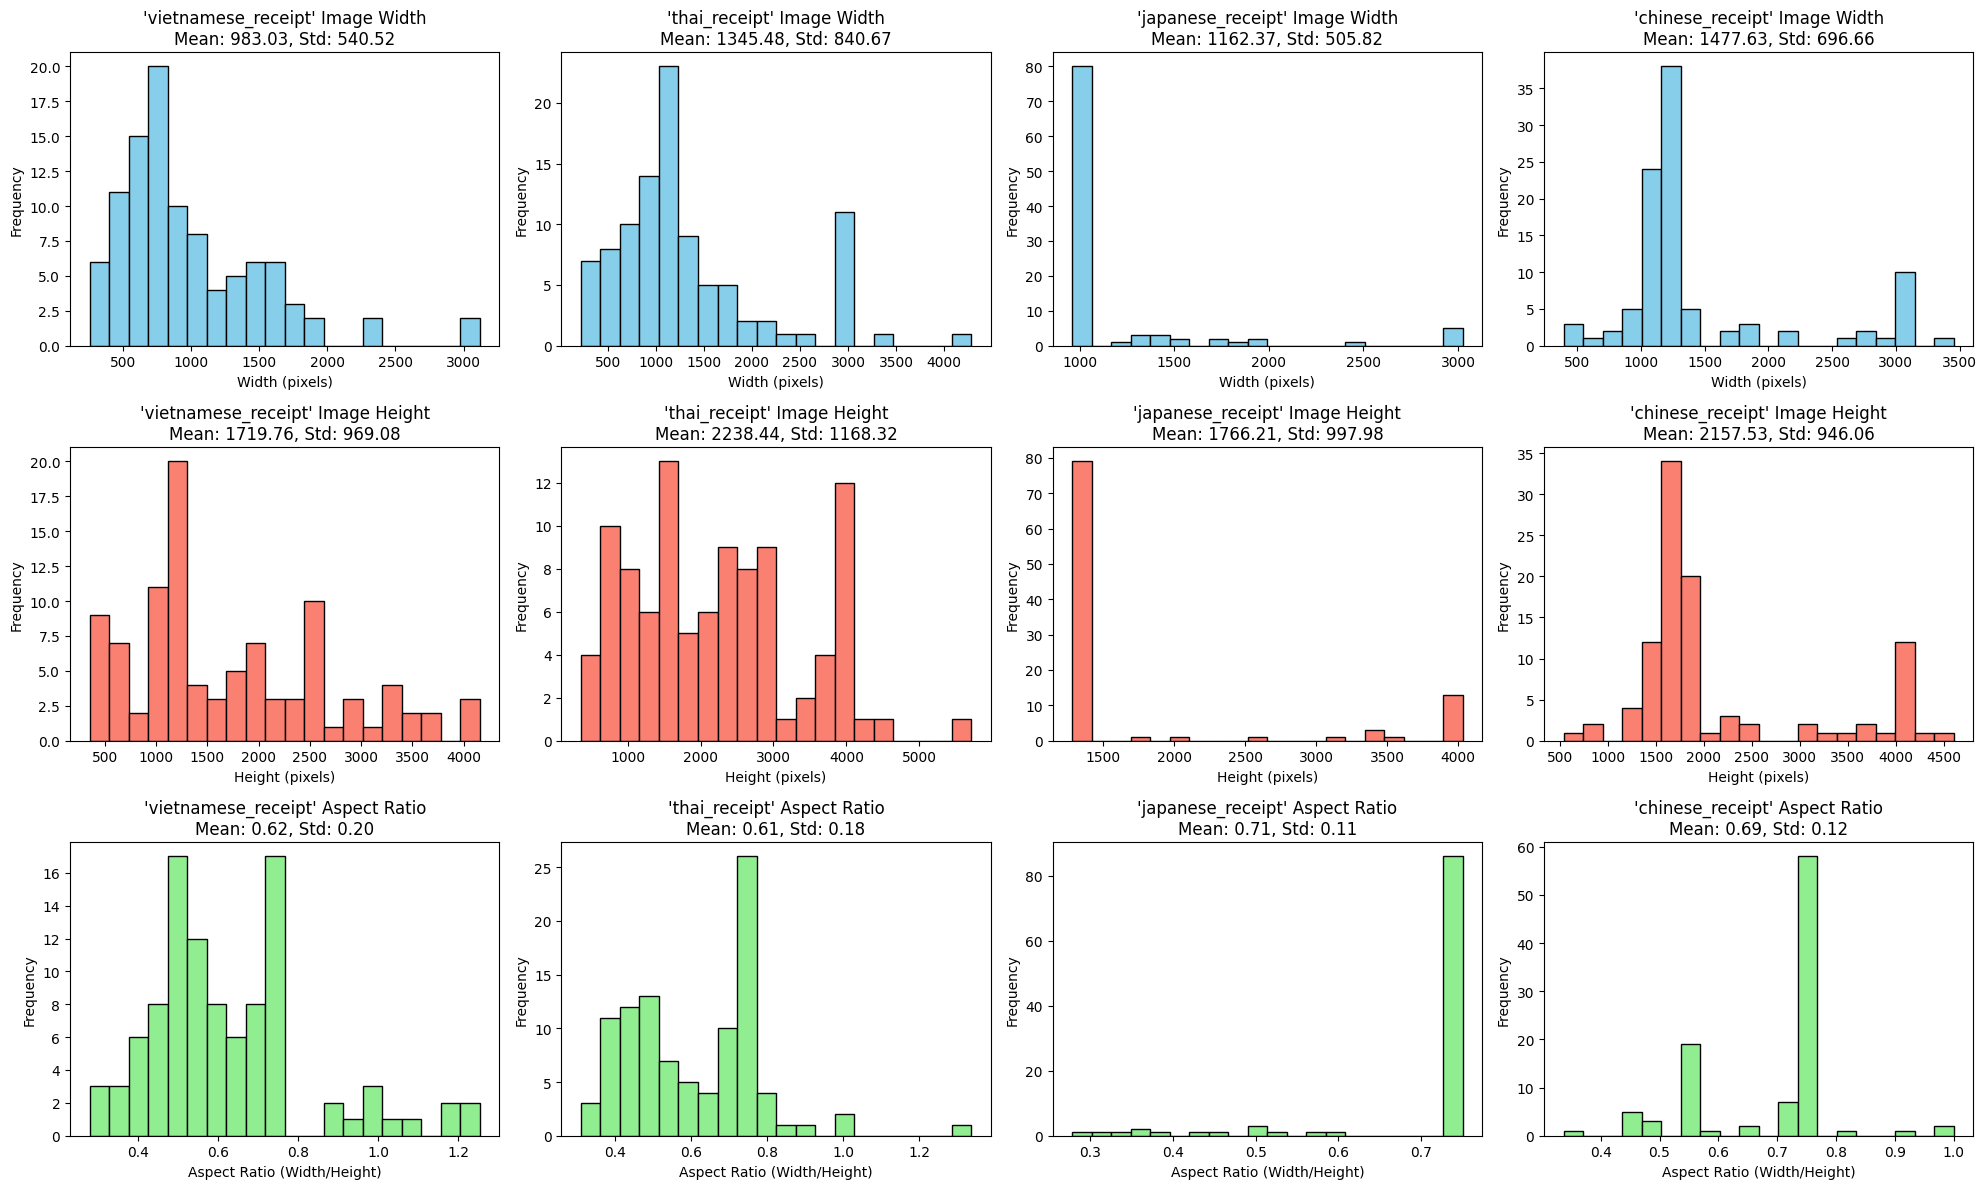

In [24]:
image_sizes = {subfolder: {'width': [], 'height': [], 'aspect_ratio': []} for subfolder in language_folder}  # 각 폴더별 이미지 크기 및 종횡비 저장

# 각 폴더의 train 데이터셋에서 이미지 크기 추출
for subfolder in language_folder:
    json_path = os.path.join(data_rootpath, subfolder, 'ufo', 'train.json')
    
    # JSON 파일 읽기
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    # 이미지별 크기 및 종횡비 추출
    for image_id, image_info in data.get('images', {}).items():
        img_w = image_info.get("img_w", 0)  # 이미지 너비
        img_h = image_info.get("img_h", 0)  # 이미지 높이
        
        image_sizes[subfolder]['width'].append(img_w)
        image_sizes[subfolder]['height'].append(img_h)
        
        # 종횡비 계산
        if img_h > 0:  # 높이가 0이 아닐 경우에만 계산
            aspect_ratio = img_w / img_h
            image_sizes[subfolder]['aspect_ratio'].append(aspect_ratio)

# 시각화
fig, axes = plt.subplots(3, 4, figsize=(20, 12))

# 각 폴더별 이미지 너비, 높이 및 종횡비 분포 시각화
for i, (subfolder, sizes) in enumerate(image_sizes.items()):
    ax_width = axes[0, i]  # 첫 번째 행에 너비 subplot
    ax_height = axes[1, i]  # 두 번째 행에 높이 subplot
    ax_aspect_ratio = axes[2, i]  # 세 번째 행에 종횡비 subplot
    
    # 너비 히스토그램
    ax_width.hist(sizes['width'], bins=20, color='skyblue', edgecolor='black')
    
    # 통계 정보 계산
    desc_stats_width = pd.Series(sizes['width']).describe()
    mean_width = desc_stats_width['mean']
    std_dev_width = desc_stats_width['std']
    
    ax_width.set_title(f"'{subfolder}' Image Width\nMean: {mean_width:.2f}, Std: {std_dev_width:.2f}")
    ax_width.set_xlabel("Width (pixels)")
    ax_width.set_ylabel("Frequency")
    
    # 높이 히스토그램
    ax_height.hist(sizes['height'], bins=20, color='salmon', edgecolor='black')
    
    # 통계 정보 계산
    desc_stats_height = pd.Series(sizes['height']).describe()
    mean_height = desc_stats_height['mean']
    std_dev_height = desc_stats_height['std']
    
    ax_height.set_title(f"'{subfolder}' Image Height\nMean: {mean_height:.2f}, Std: {std_dev_height:.2f}")
    ax_height.set_xlabel("Height (pixels)")
    ax_height.set_ylabel("Frequency")
    
    # 종횡비 히스토그램
    ax_aspect_ratio.hist(sizes['aspect_ratio'], bins=20, color='lightgreen', edgecolor='black')
    
    # 통계 정보 계산
    desc_stats_aspect_ratio = pd.Series(sizes['aspect_ratio']).describe()
    mean_aspect_ratio = desc_stats_aspect_ratio['mean']
    std_dev_aspect_ratio = desc_stats_aspect_ratio['std']
    
    ax_aspect_ratio.set_title(f"'{subfolder}' Aspect Ratio\nMean: {mean_aspect_ratio:.2f}, Std: {std_dev_aspect_ratio:.2f}")
    ax_aspect_ratio.set_xlabel("Aspect Ratio (Width/Height)")
    ax_aspect_ratio.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


### 테스트 데이터셋 이미지 크기 분포 (width, height) 및 가로 세로 비율 분포

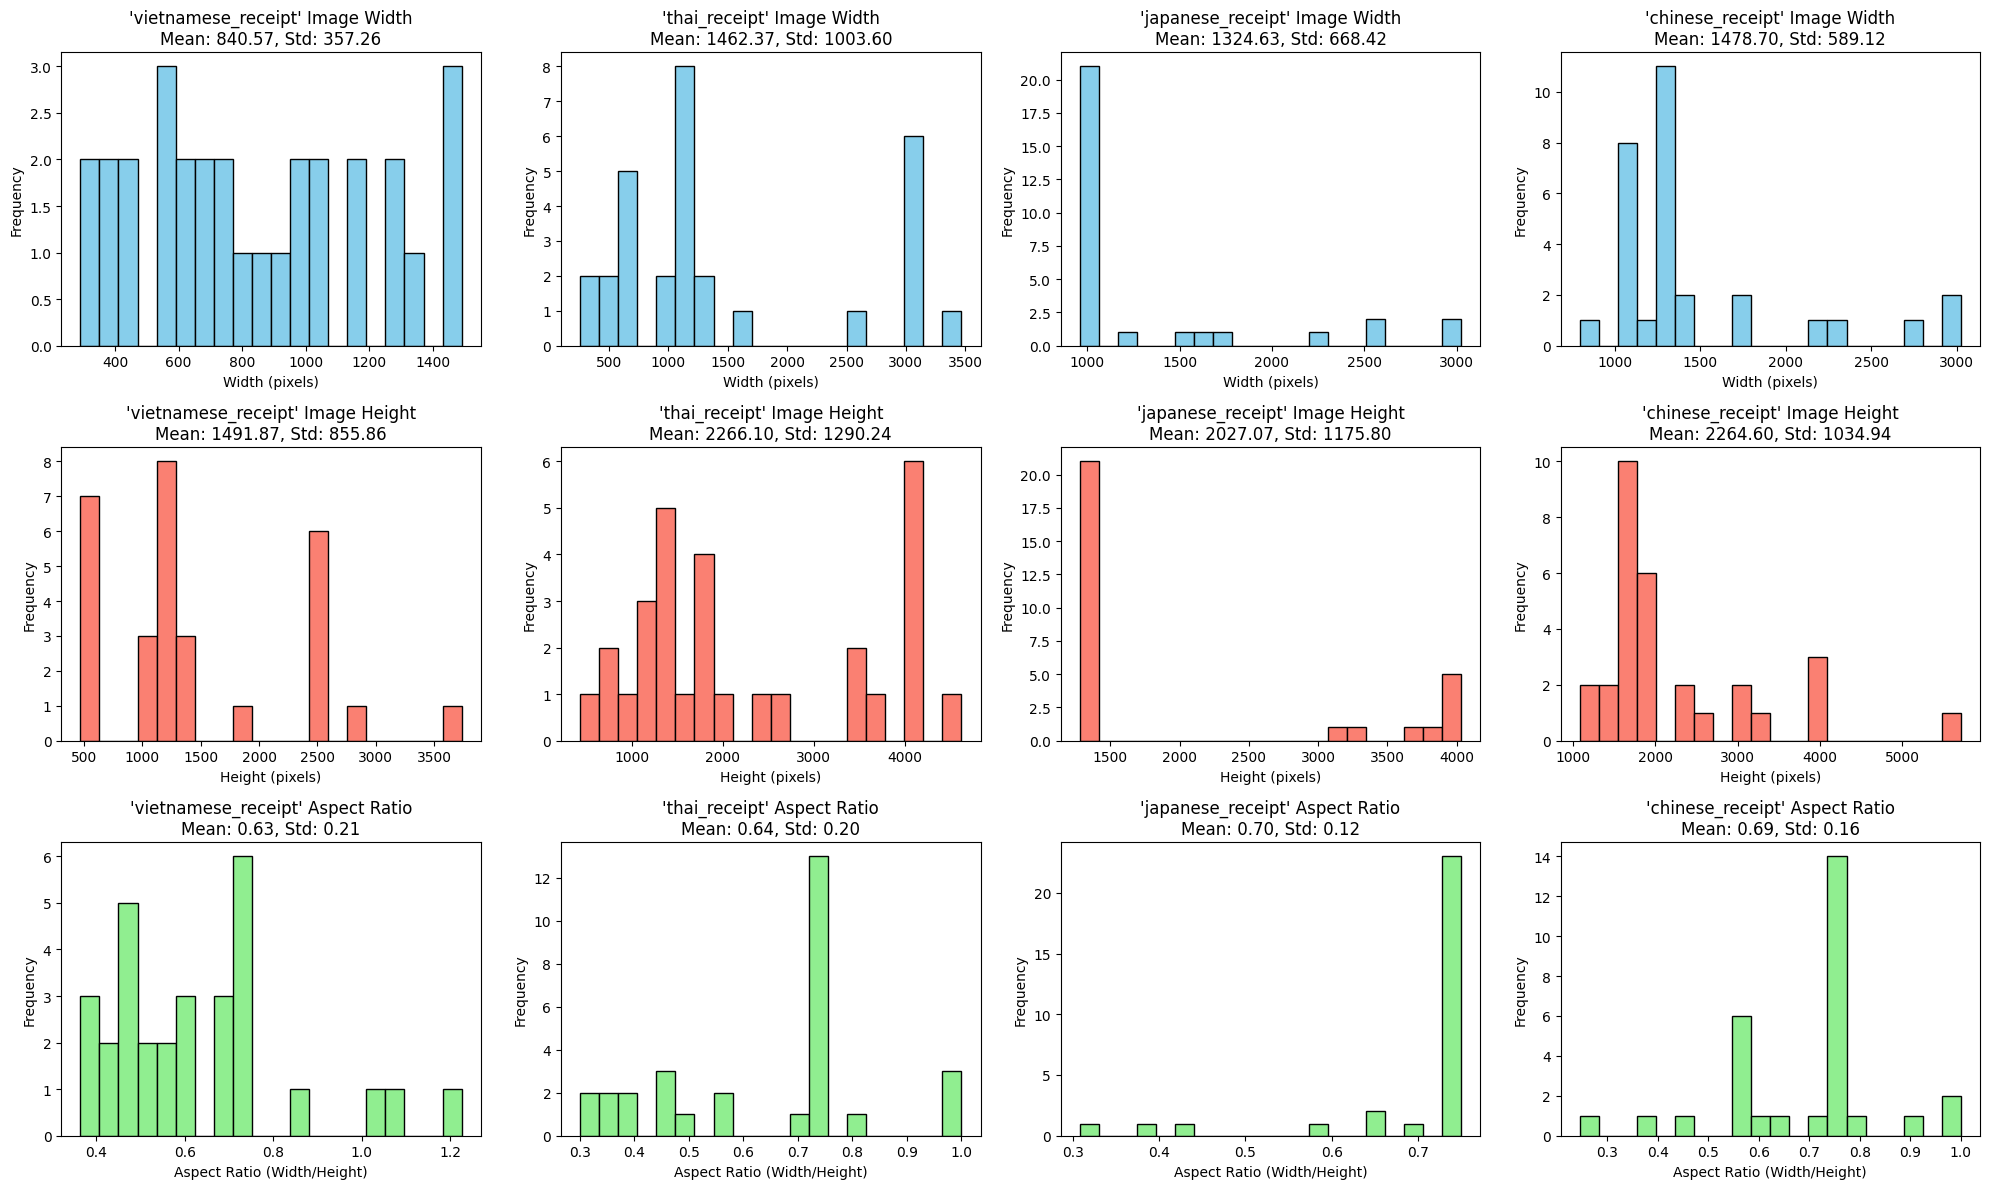

In [25]:
image_sizes = {subfolder: {'width': [], 'height': [], 'aspect_ratio': []} for subfolder in language_folder}  # 각 폴더별 이미지 크기 및 종횡비 저장

# 각 폴더의 train 데이터셋에서 이미지 크기 추출
for subfolder in language_folder:
    json_path = os.path.join(data_rootpath, subfolder, 'ufo', 'test.json')
    
    # JSON 파일 읽기
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    # 이미지별 크기 및 종횡비 추출
    for image_id, image_info in data.get('images', {}).items():
        img_w = image_info.get("img_w", 0)  # 이미지 너비
        img_h = image_info.get("img_h", 0)  # 이미지 높이
        
        image_sizes[subfolder]['width'].append(img_w)
        image_sizes[subfolder]['height'].append(img_h)
        
        # 종횡비 계산
        if img_h > 0:  # 높이가 0이 아닐 경우에만 계산
            aspect_ratio = img_w / img_h
            image_sizes[subfolder]['aspect_ratio'].append(aspect_ratio)

# 시각화
fig, axes = plt.subplots(3, 4, figsize=(20, 12))

# 각 폴더별 이미지 너비, 높이 및 종횡비 분포 시각화
for i, (subfolder, sizes) in enumerate(image_sizes.items()):
    ax_width = axes[0, i]  # 첫 번째 행에 너비 subplot
    ax_height = axes[1, i]  # 두 번째 행에 높이 subplot
    ax_aspect_ratio = axes[2, i]  # 세 번째 행에 종횡비 subplot
    
    # 너비 히스토그램
    ax_width.hist(sizes['width'], bins=20, color='skyblue', edgecolor='black')
    
    # 통계 정보 계산
    desc_stats_width = pd.Series(sizes['width']).describe()
    mean_width = desc_stats_width['mean']
    std_dev_width = desc_stats_width['std']
    
    ax_width.set_title(f"'{subfolder}' Image Width\nMean: {mean_width:.2f}, Std: {std_dev_width:.2f}")
    ax_width.set_xlabel("Width (pixels)")
    ax_width.set_ylabel("Frequency")
    
    # 높이 히스토그램
    ax_height.hist(sizes['height'], bins=20, color='salmon', edgecolor='black')
    
    # 통계 정보 계산
    desc_stats_height = pd.Series(sizes['height']).describe()
    mean_height = desc_stats_height['mean']
    std_dev_height = desc_stats_height['std']
    
    ax_height.set_title(f"'{subfolder}' Image Height\nMean: {mean_height:.2f}, Std: {std_dev_height:.2f}")
    ax_height.set_xlabel("Height (pixels)")
    ax_height.set_ylabel("Frequency")
    
    # 종횡비 히스토그램
    ax_aspect_ratio.hist(sizes['aspect_ratio'], bins=20, color='lightgreen', edgecolor='black')
    
    # 통계 정보 계산
    desc_stats_aspect_ratio = pd.Series(sizes['aspect_ratio']).describe()
    mean_aspect_ratio = desc_stats_aspect_ratio['mean']
    std_dev_aspect_ratio = desc_stats_aspect_ratio['std']
    
    ax_aspect_ratio.set_title(f"'{subfolder}' Aspect Ratio\nMean: {mean_aspect_ratio:.2f}, Std: {std_dev_aspect_ratio:.2f}")
    ax_aspect_ratio.set_xlabel("Aspect Ratio (Width/Height)")
    ax_aspect_ratio.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


### 훈련 데이터 각 언어별 box 개수 분포

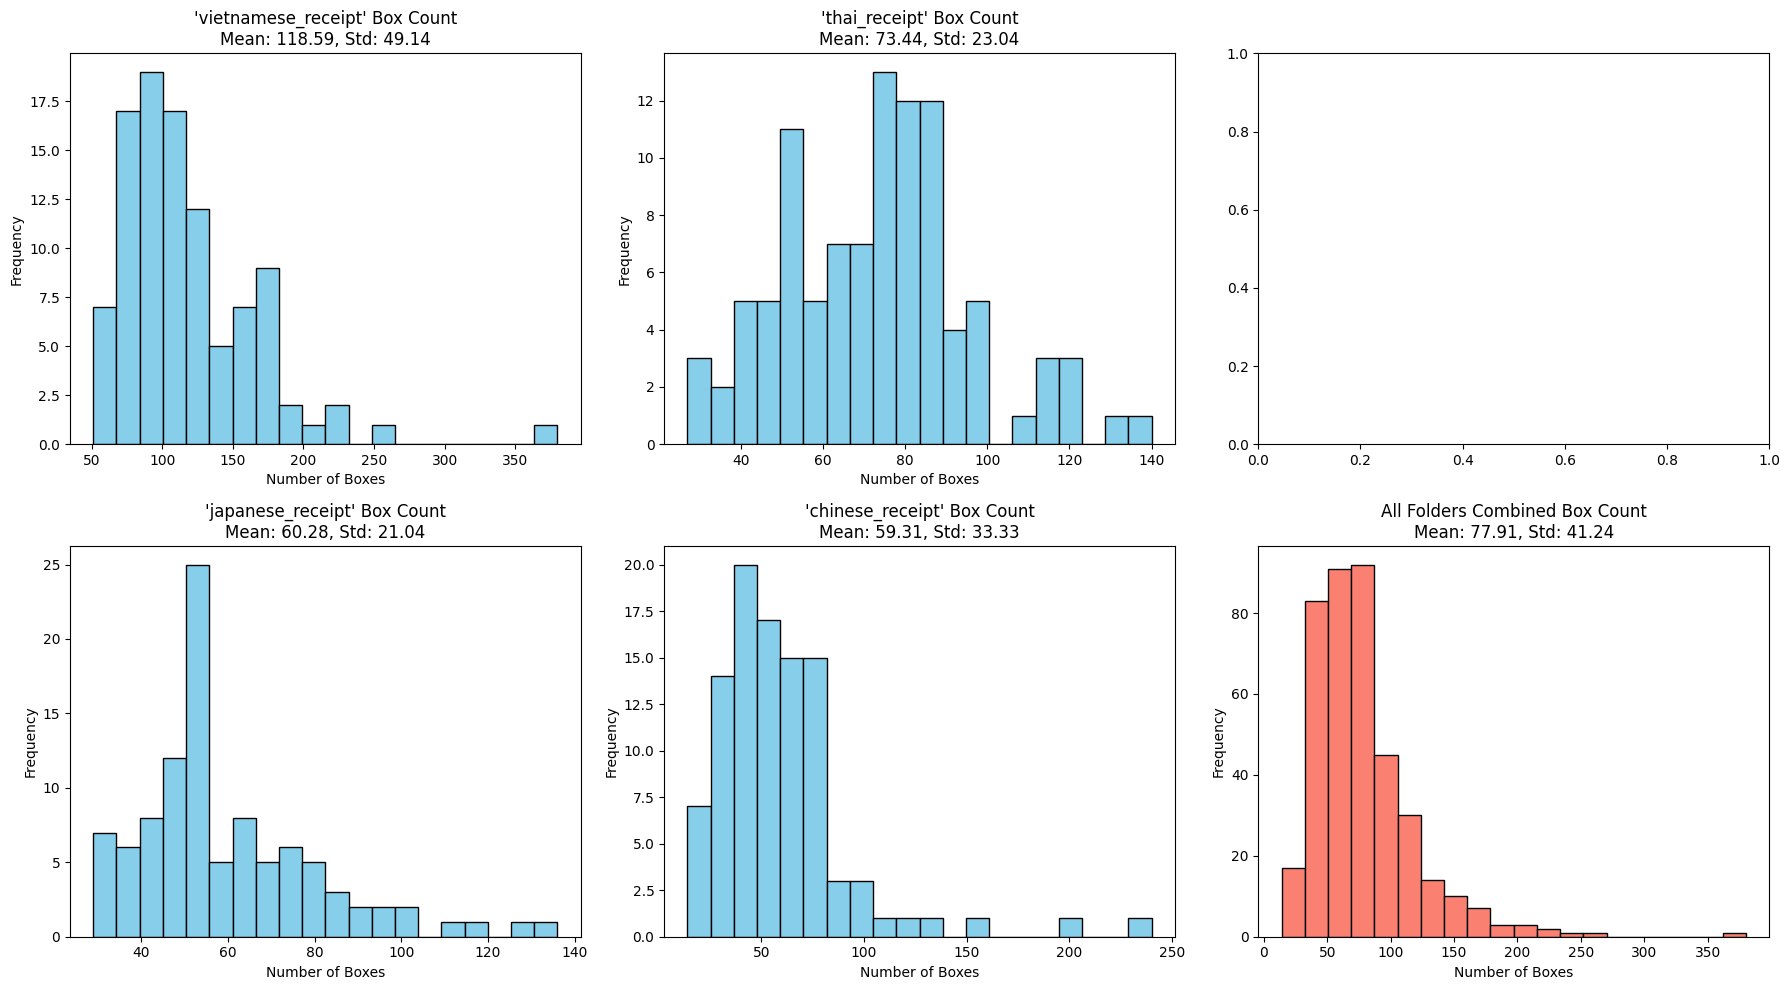

In [18]:
folder_box_counts = {subfolder: [] for subfolder in language_folder}  # 각 폴더별 box 개수 저장
total_box_counts = []  # 전체 폴더를 합친 box 개수 저장

# 각 폴더의 train 데이터셋에서 이미지별 전체 box 개수 계산
for subfolder in language_folder:
    json_path = os.path.join(data_rootpath, subfolder, 'ufo', 'train.json')
    
    # JSON 파일 읽기
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    # 이미지별로 box 개수 계산
    for image_id, image_info in data.get('images', {}).items():
        num_boxes = len(image_info.get('words', {}))
        folder_box_counts[subfolder].append(num_boxes)  # 각 폴더별로 저장
        total_box_counts.append(num_boxes)  # 전체 리스트에 저장

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 각 폴더별 box 개수 분포 시각화
for i, (subfolder, box_counts) in enumerate(folder_box_counts.items()):
    ax = axes[i // 2, i % 2]  # 2x2 그리드
    ax.hist(box_counts, bins=20, color='skyblue', edgecolor='black')
    
    # 통계 정보 계산
    desc_stats = pd.Series(box_counts).describe()
    mean = desc_stats['mean']
    std_dev = desc_stats['std']
    
    ax.set_title(f"'{subfolder}' Box Count\nMean: {mean:.2f}, Std: {std_dev:.2f}")
    ax.set_xlabel("Number of Boxes")
    ax.set_ylabel("Frequency")

# 전체 데이터 시각화 (우측 하단에 위치)
axes[1, 2].hist(total_box_counts, bins=20, color='salmon', edgecolor='black')
desc_stats_total = pd.Series(total_box_counts).describe()
mean_total = desc_stats_total['mean']
std_dev_total = desc_stats_total['std']

axes[1, 2].set_title(f"All Folders Combined Box Count\nMean: {mean_total:.2f}, Std: {std_dev_total:.2f}")
axes[1, 2].set_xlabel("Number of Boxes")
axes[1, 2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


### 중심 좌표의 분포 시각화

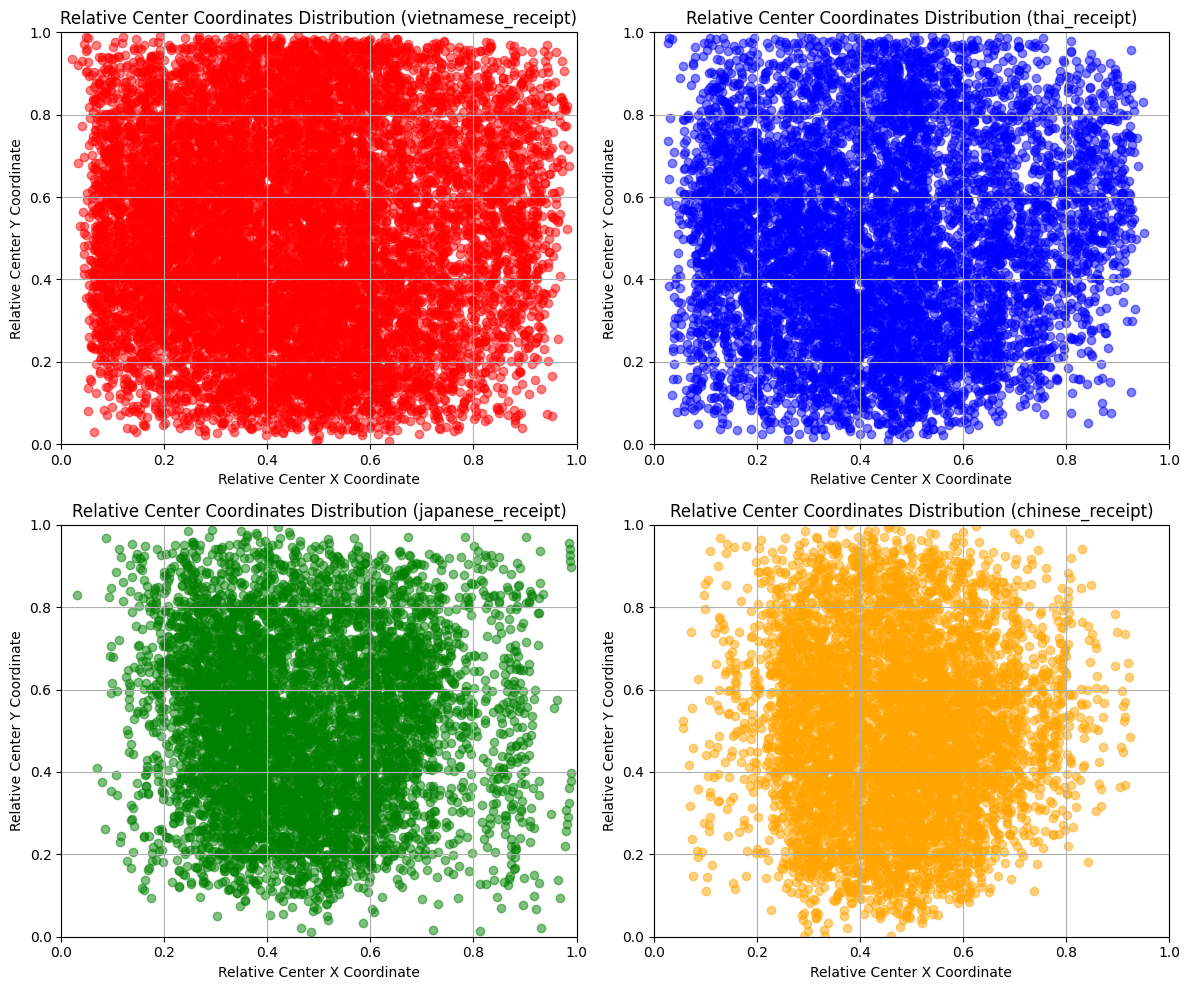

In [32]:
colors = ['red', 'blue', 'green', 'orange']  # 각 폴더에 사용할 색상

center_coordinates = {subfolder: {'center_x': [], 'center_y': []} for subfolder in language_folder}  # 각 폴더별 중심 좌표 저장

# 각 폴더의 train 데이터셋에서 중심 좌표 추출
for subfolder in language_folder:
    json_path = os.path.join(data_rootpath, subfolder, 'ufo', 'train.json')
    
    # JSON 파일 읽기
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    # 이미지별 바운딩 박스에서 중심 좌표 추출
    for image_id, image_info in data.get('images', {}).items():
        img_w = image_info.get("img_w", 1)  # 0으로 나누는 것을 방지하기 위해 기본값 1 설정
        img_h = image_info.get("img_h", 1)  # 0으로 나누는 것을 방지하기 위해 기본값 1 설정

        for word_id, word_info in image_info.get('words', {}).items():
            points = word_info['points']
            # 좌표를 상단 좌측, 하단 우측으로 간주하여 중심 계산
            top_x = points[0][0]
            top_y = points[0][1]
            bot_x = points[2][0]
            bot_y = points[2][1]
            
            center_x = (top_x + bot_x) / 2 / img_w
            center_y = (top_y + bot_y) / 2 / img_h
            
            center_coordinates[subfolder]['center_x'].append(center_x)
            center_coordinates[subfolder]['center_y'].append(center_y)

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# 각 폴더별 상대 중심 좌표 산점도
for i, subfolder in enumerate(language_folder):
    axes[i].scatter(center_coordinates[subfolder]['center_x'], 
                     center_coordinates[subfolder]['center_y'], 
                     alpha=0.5,
                     color=colors[i])
    axes[i].set_title(f'Relative Center Coordinates Distribution ({subfolder})')
    axes[i].set_xlabel('Relative Center X Coordinate')
    axes[i].set_ylabel('Relative Center Y Coordinate')
    axes[i].set_xlim(0, 1)
    axes[i].set_ylim(0, 1)
    axes[i].grid()

plt.tight_layout()
plt.show()
